https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/

In [1]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd

pd.set_option( 'display.max_columns' , None ) 

In [3]:
from pandas import read_csv

In [4]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'

df = read_csv( url , header = None , na_values = '?' )

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.shape

(48842, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48842 non-null  int64 
 1   1       46043 non-null  object
 2   2       48842 non-null  int64 
 3   3       48842 non-null  object
 4   4       48842 non-null  int64 
 5   5       48842 non-null  object
 6   6       46033 non-null  object
 7   7       48842 non-null  object
 8   8       48842 non-null  object
 9   9       48842 non-null  object
 10  10      48842 non-null  int64 
 11  11      48842 non-null  int64 
 12  12      48842 non-null  int64 
 13  13      47985 non-null  object
 14  14      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df = df.dropna()

In [9]:
df.shape

(45222, 15)

In [10]:
from collections import Counter

In [11]:
target = df.values[ : , -1 ]

counter = Counter( target )

print( counter )

Counter({'<=50K': 34014, '>50K': 11208})


In [12]:
for k , v in counter.items():

    p = v / len( target ) * 100

    print( f'class : {k} | count : {v} | % : {p:.2f} ' )

class : <=50K | count : 34014 | % : 75.22 
class : >50K | count : 11208 | % : 24.78 


In [13]:
last_ix = len( df.columns ) - 1

X = df.drop( last_ix , axis = 1 )

y = df[ last_ix ]

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
y = LabelEncoder().fit_transform( y )

In [16]:
cat_ix = X.select_dtypes( include = [ 'object' , 'bool' ] ).columns

num_ix = X.select_dtypes( include = [ 'int64' , 'float64' ] ).columns

print( cat_ix )

print( num_ix )

Int64Index([1, 3, 5, 6, 7, 8, 9, 13], dtype='int64')
Int64Index([0, 2, 4, 10, 11, 12], dtype='int64')


# Baseline Result

In [17]:
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.model_selection import cross_val_score

In [18]:
def evaluate_model( X , y , model ) :

    cv = RepeatedStratifiedKFold( n_splits = 10 , n_repeats = 3 , random_state = 999 )

    scores = cross_val_score( model , X , y , scoring = 'accuracy' , cv = cv , n_jobs = -1 )

    return scores

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
model = DummyClassifier( strategy = 'most_frequent' )

In [21]:
from numpy import mean

from numpy import std

In [22]:
scores = evaluate_model( X , y , model )

print( f'dummy model | accuracy : {mean(scores):.3f} ( {std(scores):.3f} )' )

dummy model | accuracy : 0.752 ( 0.000 )


# Evaluate Machine Learning Algorithms

In [29]:
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import BaggingClassifier

In [30]:
def get_models():

    models = dict()

    transformers = [ ( 'ohe' , OneHotEncoder( handle_unknown = 'ignore' ) , cat_ix ) ,
                     ( 'scale' , MinMaxScaler() , num_ix ) ]
    
    transformer = ColumnTransformer( transformers )
    
    
    
    steps = [ ( 'step_transformer' , transformer ) ,
              ( 'step_model' , DecisionTreeClassifier() ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'CART' ] = model
  


    steps = [ ( 'step_transformer' , transformer ) ,
              ( 'step_model' , SVC( gamma = 'scale' ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'SVM' ] = model
 


    steps = [ ( 'step_transformer' , transformer ) ,
              ( 'step_model' , BaggingClassifier( n_estimators = 100 ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'BAG' ] = model
   


    steps = [ ( 'step_transformer' , transformer ) ,
              ( 'step_model' , RandomForestClassifier( n_estimators = 100 ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'RF' ] = model



    steps = [ ( 'step_transformer' , transformer ) ,
              ( 'step_model' , GradientBoostingClassifier( n_estimators = 100 ) ) ]
    
    model = Pipeline( steps = steps )
    
    models[ 'GBM' ] = model
    

    return models

In [31]:
models = get_models()

results = list()

names = list()


for name , model in models.items() :
    
    names.append( name )
    
    scores = evaluate_model( X , y , model ) 
    
    results.append( scores )
    
    print( f' model : {name} : {mean(scores):.3f} ( {std(scores):.3f} )' )

 model : CART : 0.812 ( 0.005 )
 model : SVM : 0.836 ( 0.006 )
 model : BAG : 0.852 ( 0.004 )
 model : RF : 0.850 ( 0.004 )
 model : GBM : 0.864 ( 0.005 )


In [32]:
from matplotlib import pyplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1d823898>,
 'caps': [<matplotlib.lines.Line2D at 0x1d823f98>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d8232b0>,
 'medians': [<matplotlib.lines.Line2D at 0x1d8305f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1d830c88>,
 'means': [<matplotlib.lines.Line2D at 0x1d830940>,
  <matplotlib.lines.Line2D at 0x1d87f400>]}

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

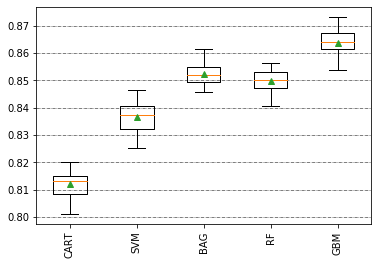

In [33]:
pyplot.boxplot( results , labels = names , showmeans = True )

pyplot.grid( axis = 'y' , color = 'black' , linestyle = '-.' , linewidth = 0.5 )

pyplot.xticks( rotation = 90 )

pyplot.show()